#Inequality Indexes according to the U.S. Census Bureau in 2019


In [ ]:
# importing the libraries
import numpy as np
from matplotlib import pyplot as plt
from ineqpy.inequality import gini

float64
0.4810925546879187


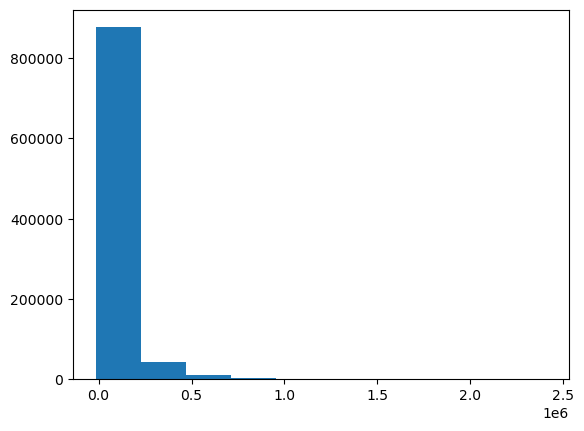

In [ ]:
# fetch the data and visualizing it
your_array = np.loadtxt(
    "https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/us_household_incomes.txt"
)
plt.hist(your_array)
print(your_array.dtype.name)


This is not a normal distribution, not uniform either. It is not equal, the graph is right skewed meaning there are top earners condensed in that range.

In [ ]:
# Calculating the gini index for all the hosueholds below the poverty line
ex4_gini = gini(your_array)
poverty_line = 20000
ex4_share_below_poverty = your_array[your_array < poverty_line]
print(ex4_share_below_poverty)
print(ex4_gini)

[    0. 15980. 10000. ... 14000.  7636. 19856.]
0.4810925546879187


We compared the gini index to other countries and it at position 20 from the top, coming in close to countries like Honduras.

In [ ]:
# Calculating the gini index for households below 40k and 30k
results = {}
ex6_gini_policy_a = gini(your_array[your_array < 40000])
ex6_gini_policy_b = gini(your_array[your_array < 30000])
results["ex6_gini_policy_a"] = ex6_gini_policy_a
results["ex6_gini_policy_b"] = ex6_gini_policy_b
# Storing the results of the lower gini index policy in results
results["ex6_gini_which_reduced_more"] = "Policy A"
experiment1 = your_array.copy()

Policy A is lower so it is a better policy and more equal.

In [ ]:
# Taking 5% tax from all people with annual income above $250k
ex7_gini_policy_c = gini(your_array[your_array > 250000] * 0.05)
print(ex7_gini_policy_c)

0.20253166782390997


This gini index is way lower than Policy A and B  which makes it a more equal policy.

In [ ]:
# Summing the total tax collected from all people with annual income above $250k
ex8_policy_d = sum(your_array[your_array > 250000] * 0.05)
print(ex8_policy_d)
results["ex8_revenue_raised"] = ex8_policy_d

929623340.8499994


In [ ]:
# Calculating the average tax distrubted to people with annual income less than $30k
ex9 = your_array[your_array < 30000]
results["ex9_transfer"] = ex9.size
print(results)
avg = ex8_policy_d / ex9.size

{'ex6_gini_policy_a': np.float64(0.3057812804966173), 'ex6_gini_policy_b': np.float64(0.30722452878540046), 'ex6_gini_which_reduced_more': 'Policy A', 'ex8_revenue_raised': np.float64(929623340.8499994), 'ex9_transfer': 220906}


In [ ]:
# Assigning the tax collected to the lower income households
ex10 = your_array[your_array > 250000] * 0.95
print(ex10)
ex9 += avg
ex10_gini_policy_d = gini(ex9)
print(ex10_gini_policy_d)

[509500.2  395028.05 308979.9  ... 237789.75 384426.05 387087.  ]
0.14961673823434893


In [ ]:
# Calculating the average tax distrubted to people with annual income less than $40k
ex11 = your_array[your_array < 40000]
avg = ex8_policy_d / ex11.size
# Assigning the tax collected to the lower income households
ex11 += avg
ex11_gini_policy_e = gini(ex11)
print(ex11_gini_policy_e)

0.26695580321050083


Policy D is much better as it has a very small gini index actually close to 0. It is smaller than Gini index of Policy E.

In [ ]:
# Storing the recommended policy to results
results["ex12_policy_recommendation"] = "Policy D"